# Compare DQN improvements
- Double DQN
- Dueling DQN
- Prioritized experience replay

In [21]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

## Load scores

In [32]:
experiment_dirs = list(Path('../experiments').glob('*per*'))

In [33]:
experiments = [
    (experiment.name, pd.read_csv(experiment / 'scores.csv'))
    for experiment in [
        *experiment_dirs
# #         'dqn_64_64', 
#         'double_dqn',
#         'dqn_per_alpha_0', 
#         'dqn_per_alpha_0_2',
#         'dqn_per_alpha_0_2_beta_0_0'
#     ]
]]

## Comparison graphs

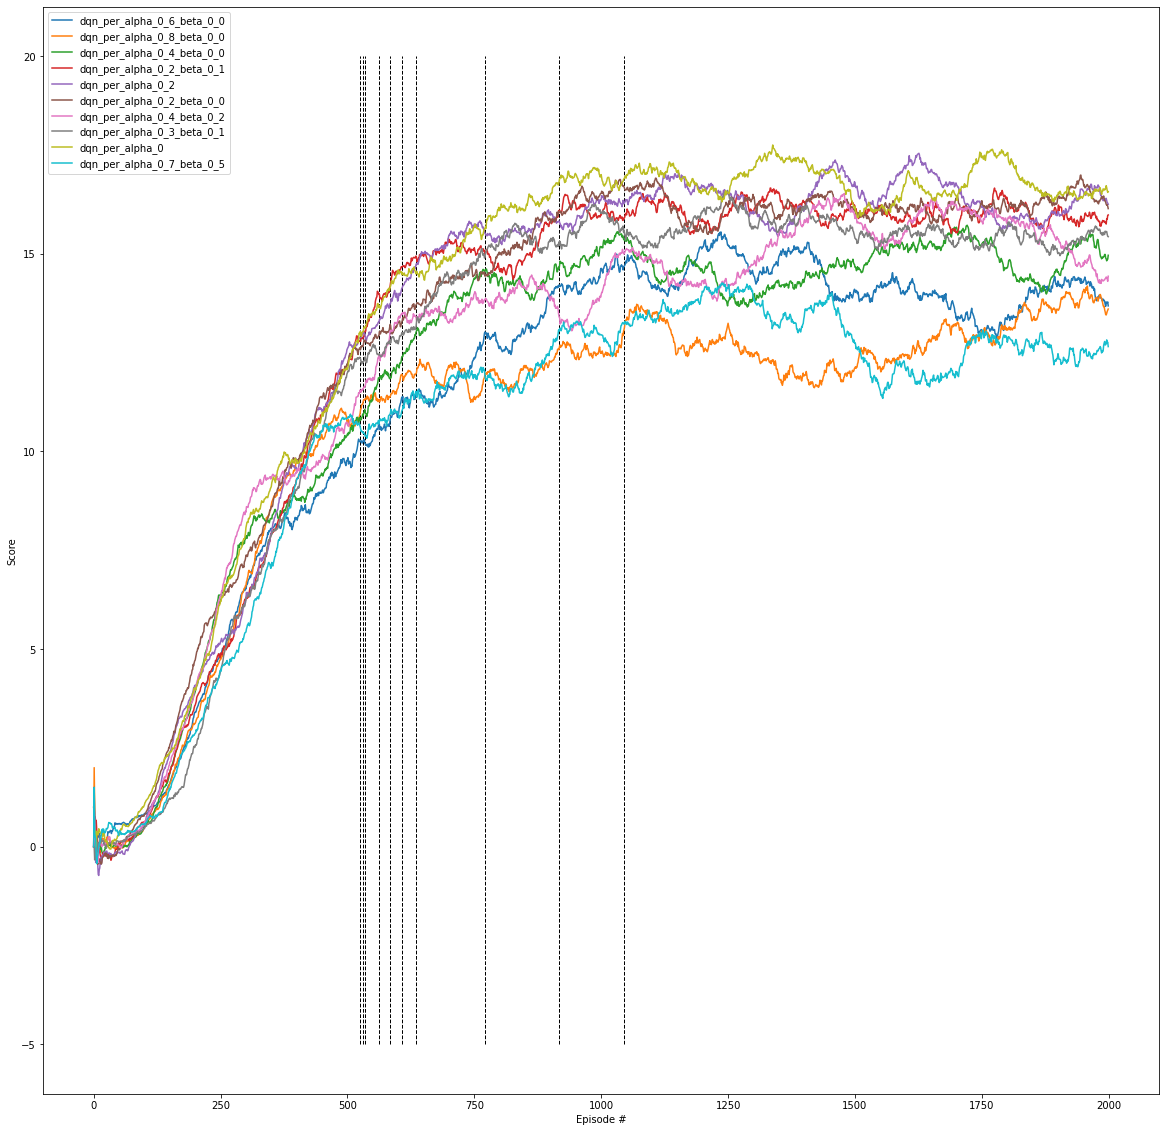

In [35]:
plt.figure(figsize=(20, 20))
plt.xlabel('Episode #')
plt.ylabel('Score')

for [name, scores] in experiments:

    ylim = (-5, 20)
    smoothened_scores = scores['score'].rolling(window=100, min_periods=0).mean()
    solution_episode = scores['episode'][smoothened_scores >= 13.0].iloc[0]
    
    plt.plot(scores['episode'], smoothened_scores, label=name)
    plt.vlines(solution_episode, *ylim, linestyle='--', linewidth=1)

plt.legend()
plt.savefig('../artifacts/dqn_improvements_comparison.png')
plt.show()